# 6.4 Machine Learning p1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'/Users/mentaykoshzhanova/Desktop/boat project'

In [4]:
# Using path join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_vis_explore.csv'), index_col = False)

## 2. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Condition', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days',
       'Price_in_usd', 'Country', 'Price_category', 'Boat Age'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Condition,Year Built,Length,Width,Material,Number of views last 7 days,Price_in_usd,Country,Price_category,Boat Age
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3704.07,Switzerland,Low price,New boat
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3734.30,Germany,Low price,New boat
2,2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,4184.70,Switzerland,Low price,NaN
3,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3626.00,Denmark,Low price,New boat
4,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3636.93,Germany,Low price,New boat


In [7]:
# dropping Unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.shape

(9888, 12)

In [13]:
# select only the necessary columns and put them in a list called columns
columns = ['Year Built', 'Price_in_usd', 'Length', 'Width', 'Number of views last 7 days']

In [14]:
# create a subset
df_clean = df[columns]

In [15]:
# Check for missing values
df_clean.isnull().sum()

Year Built                     0
Price_in_usd                   0
Length                         0
Width                          0
Number of views last 7 days    0
dtype: int64

In [16]:
# Impute missing values with median for price column
df['Price_in_usd'].fillna(df['Price_in_usd'].median(), inplace=True)
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)

In [18]:
# Check for missing values
df_clean.isnull().sum()

Year Built                     0
Price_in_usd                   0
Length                         0
Width                          0
Number of views last 7 days    0
dtype: int64

In [19]:
# check for duplicates
dups = df_clean.duplicated()
dups.shape

(9888,)

### Extreme values check

/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_38156/2525538917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Price_in_usd'], bins=25)


<Axes: xlabel='Price_in_usd', ylabel='Density'>

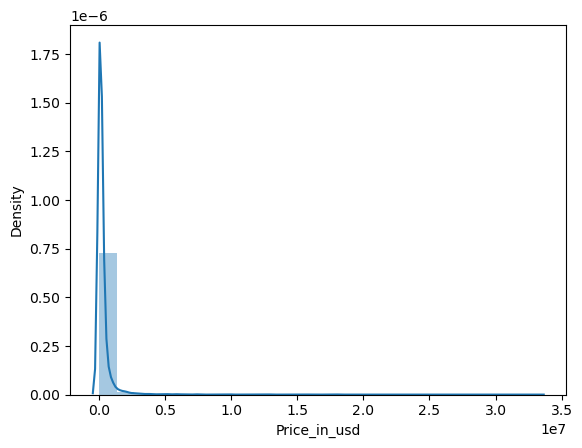

In [20]:
# show extreme values
sns.distplot(df_clean['Price_in_usd'], bins=25) 

In [21]:
# check mean, median, max of price
df_clean['Price_in_usd'].mean()

299059.777503034

In [22]:
df_clean['Price_in_usd'].median()

96300.0

In [23]:
df_clean['Price_in_usd'].max()

33170000.000000004

## 3. Data Prep for Regression Analysis

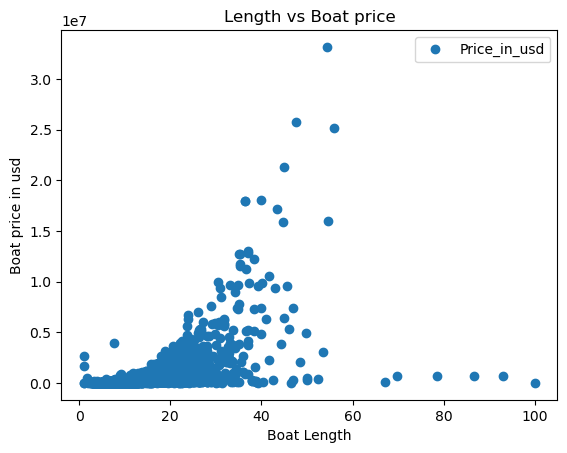

In [28]:
# task4 -  Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'Length', y = 'Price_in_usd', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length vs Boat price')  
plt.xlabel('Boat Length')  
plt.ylabel('Boat price in usd')  
plt.show()

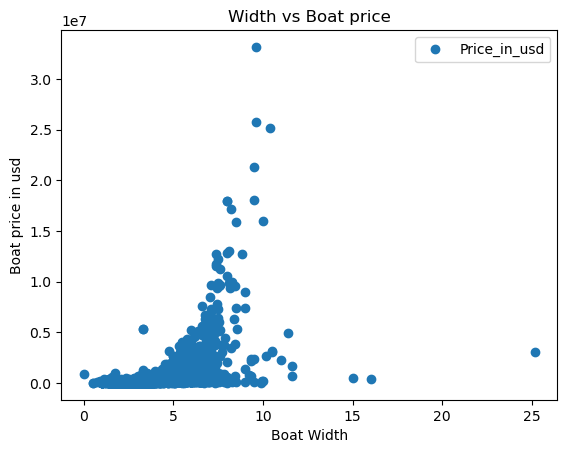

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'Width', y = 'Price_in_usd', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Width vs Boat price')  
plt.xlabel('Boat Width')  
plt.ylabel('Boat price in usd')  
plt.show()

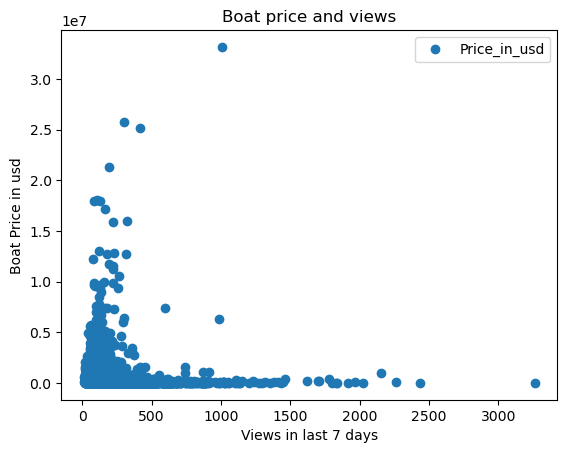

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'Number of views last 7 days', y = 'Price_in_usd', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Boat price and views')  
plt.xlabel('Views in last 7 days')  
plt.ylabel('Boat Price in usd')  
plt.show()

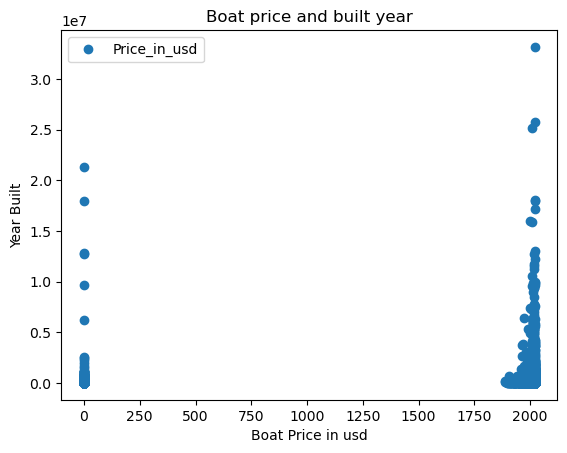

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x= 'Year Built', y= 'Price_in_usd' , style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Boat price and built year')  
plt.xlabel('Boat Price in usd')  
plt.ylabel('Year Built')  
plt.show()

## task 5 - Hypothesis:
#### 1. The longer the boat's length, the higher the price.

### Hypothesis 1:

In [29]:
# task6 - Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['Length'].values.reshape(-1,1)
y = df_clean['Price_in_usd'].values.reshape(-1,1)

In [30]:
X

array([[4.  ],
       [4.  ],
       [3.69],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [31]:
y

array([[3704.07],
       [3734.3 ],
       [4184.7 ],
       ...,
       [4813.93],
       [4601.  ],
       [4195.8 ]])

In [32]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis for Hypothesis 1

In [33]:
# Create a regression object.
regression = LinearRegression() 

In [34]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

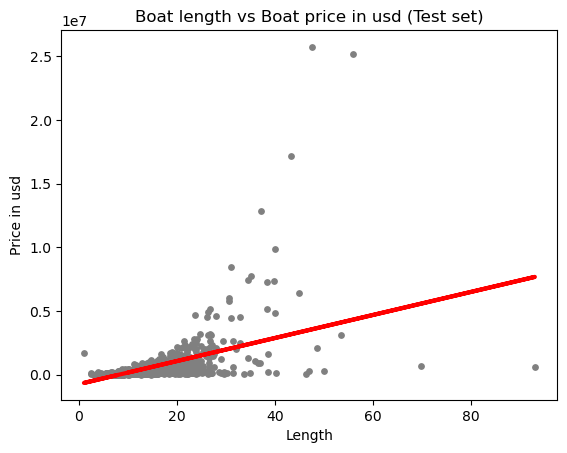

In [36]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat length vs Boat price in usd (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Price in usd')
plot_test.show()

In [37]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[90521.99127875]]
Mean squared error:  672264454241.4789
R2 score:  0.2714482417540286


In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,17013.00,1.915340e+05
1,373430.00,5.128870e+05
2,1432730.00,9.519187e+05
3,95230.00,4.359434e+05
4,363757.20,2.974447e+05
5,400715.00,1.160119e+06
6,134475.39,-6.916935e+04
7,44940.00,4.153458e+03
8,492200.00,1.136584e+06
9,80143.00,4.153458e+03


#### Compare how the regression fits the training set

In [40]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[90521.99127875]]
Mean squared error:  715109003535.1984
R2 score:  0.29138499368076576


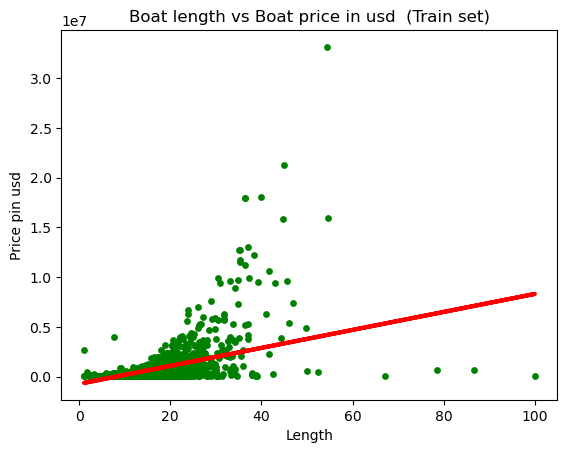

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Boat length vs Boat price in usd  (Train set)')
plot_test.xlabel('Length')
plot_test.ylabel('Price pin usd')
plot_test.show()

### MSE is farther larger away, R2 score indicates poor fit. Actual values are way off than predicted values. This model is not performing well. After confirming the inaccuracy of this model I can rule out the hypothesis that the longer boats are more expensive. 

### Bonus: performance improvement after removing outliers

In [46]:
# Clean the extreme values from the "Price in usd" variable observed during the consistency checks.

df_test = df_clean[df_clean['Price_in_usd'] <= 33170000]

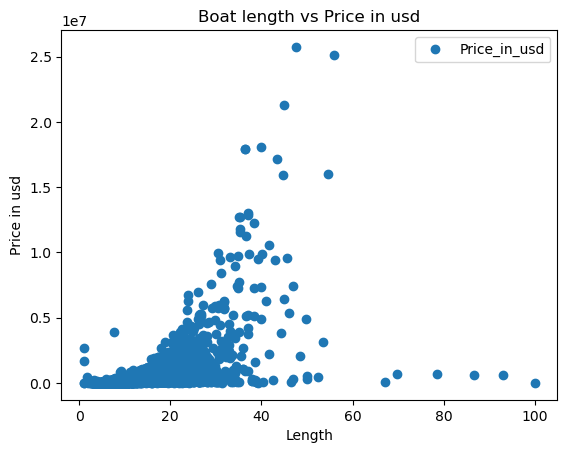

In [47]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Length', y='Price_in_usd', style='o')  
plt.title('Boat length vs Price in usd')  
plt.xlabel('Length')  
plt.ylabel('Price in usd')  
plt.show()

In [48]:
# Reshape again.

X_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['Price_in_usd'].values.reshape(-1,1)

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [50]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [51]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [52]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87150.51775901]]
Mean squared error:  606492094926.9275
R2 score:  0.2680804042957786


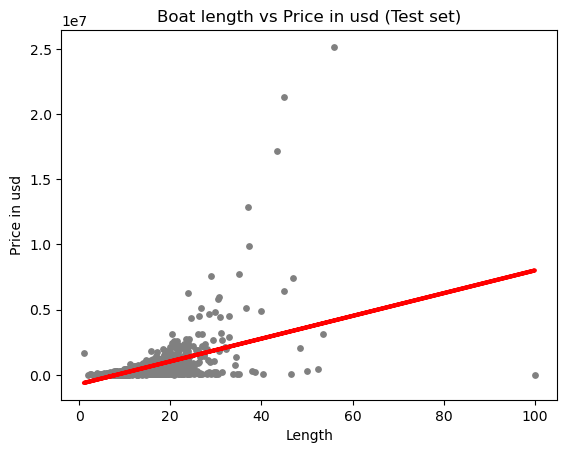

In [54]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Boat length vs Price in usd (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Price in usd')
plot_test.show()

In [55]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,17655.00,-147082.844854
1,373430.00,724422.332736
2,1428450.00,924868.523582
3,95230.00,162301.493190
4,363693.00,576266.452546
5,395900.00,849047.573132
6,119840.00,393250.365252
7,44940.00,12402.602645
8,492200.00,576266.452546
9,80143.00,12402.602645


### After removing the outlier the model still shows poor fit. Price column can be biased because of owners who price their boats, owner might ask for much higher price than it should be, or owner can try to sell for cheaper if there is any money emergency.

In [56]:
#Exporting to csv
df_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boat_regression.csv'))